In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif 

In [14]:
# Load dataset
df = pd.read_csv("../dataset/iris.csv")  # Change filename as needed
print("Initial shape:", df.shape)
print(df.head())

Initial shape: (150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.4           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.3          0.2  setosa
4           5.1          3.6           1.4          0.2  setosa


In [15]:
# Drop rows with missing values
df.dropna(inplace=True)

In [16]:
# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

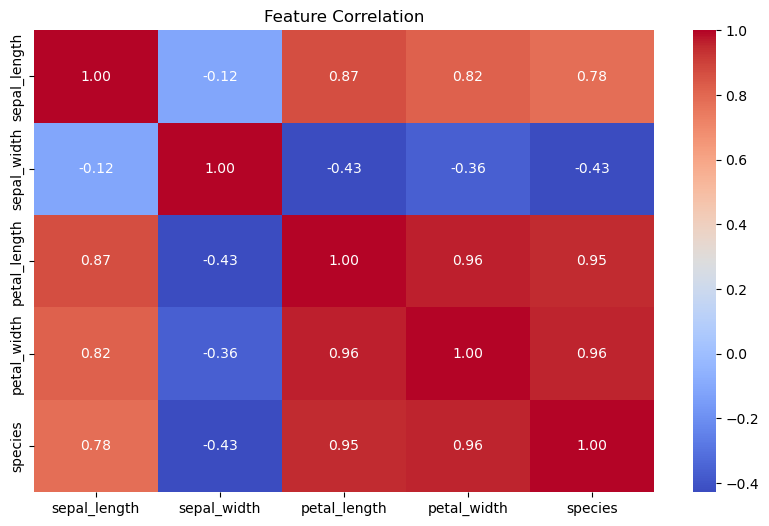

In [17]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [18]:
# Separate features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [19]:
# Normalize features
X = StandardScaler().fit_transform(X)

In [27]:
k = min(10, X.shape[1])  
selector = SelectKBest(score_func=f_classif, k=k)
X = selector.fit_transform(X, y) 
selected_features = df.columns[:-1][selector.get_support()] 
print("✅ Selected Features:", list(selected_features)) 

✅ Selected Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

Random Forest Accuracy: 1.0


In [10]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, lr_preds))

Linear Regression MSE: 0.03725433564678131


In [11]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))

Naive Bayes Accuracy: 1.0
